<a href="https://colab.research.google.com/github/afscomercial/big-data-fundamental/blob/main/assigment-one/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CBD 2214 1 - Big Data Fundamentals Data Storage Networking
## Assignment 1: Build a performing machine learning Regression algorithm 

Group 2:
* Andrea Franco C0931897
* Andres Salguero C0932873
* Harpreet Kaur 

## I) Business Case Evaluation: Seoul Bike Demand Prediction

**Justification & Motivation:**

The **scope** of this project is to predict the demand of bikes for a shop in the city of Seoul, Korea.

The **motivation** behind this project is to help the bike store to predict how many bikes should have available for rent depending on the weather condition.

In order to know which business challenges the analysis will tackle, we can stablish certain key points that will help us to guide the data analysis in a effective way and evaluate the success of our model:

**The problem** we will be tackling is the inconsistent bike availability due to unpredictable demand which leads to lost revenue (bikes unavailable during peak times) and customer unsatisfaction (unavailable bikes or too few choices).

**The solution** is the development of a bike rental demand prediction model using historical rental data and available weather information to train the model.

**Business Challenges Tackled:**

The specific business challenges that we will be helping to tackle are:

* **Demand forecasting**
* **Inventory management**
* **Customer experience**

**Goals:**

The goals that we will be targeting are:

* **Reduce lost revenue:** Make accurate predictions of peak demand periods to ensure enough bikes are available for rent. 
* **Improve customer satisfaction:** Minimize wait times and ensure an adequate number of bikes are available when needed.
* **Optimize operational efficiency:** Reduce unnecessary bike replenishment, saving time and resources.


**Key Performance Indicators (KPIs):**

Once the model has been deployed, the following KPIs could be proposed to evaluate the performance of the solution, creating a new phase of the project in which the dataset is fed with new data, and re-trained to give better results.

* **Bike rental revenue:** Track changes in revenue after implementing the prediction model.
* **Bike availability:** Monitor the difference between the number of bikes available for rent and the rent demand, specially during peak hours. 
* **Customer satisfaction:** Conduct surveys to measure customer experience.
* **Operational efficiency:** Track the time and resources spent on replenish bikes across locations.



## II) Data Identification

The next phase of the project is data identification which involves describing the specific datasets required to build our bike rental demand prediction model. As this project will focus on identifying data sources that provide historical information on bike rentals and relevant weather conditions in Seoul, Korea, the "Seoul Bike Sharing Demand Prediction" (E et al., 2020) will have enough data to take a first approach into the data analysis and development of our regression model.

This dataset provide us with information about historical public bike rental from the government of Korea and weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall). 

This data was obtained from [Kaggle Website](https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction) but the acknowledgments cite the original paper from which it was obtained at the Mendeley database and the original paper at Science Direct (E et al., 2020).

In order to create a more robust model, other types of dataset could be used for a second approach of the problem, getting data from both internal an external data sources, being internal data those coming from the bike rental companies interested in getting a better performance for their business, for instance:

**Internal Data Sources:** 
    
* Daily or hourly rental records
* Bike type (e.g., road bike, mountain bike)
* Pickup and drop-off locations
* Customer information (optional, anonymized)

**External Data Sources:**

Publicly available weather datasets for Seoul, Korea. Potential sources include:

* South Korean national weather service websites
* Open-source weather data repositories like [National Oceanic and Atmospheric Administration (NOAA) ](https://www.noaa.gov/climate)
* Weather APIs offered by private companies

Depending on the chosen data sources, it might be need to integrate data from multiple sources and make some preprocessing to ensure consistency before feeding it into our model.



## III) Data Acquisition and Filtering

In this stage, the main objective is to acquire the necessary data and filter it to ensure quality and relevance. The process involves sourcing the data from identified internal and external sources,  removing noise and inconsistencies, and filtering it to retain only the data pertinent to the bike demand prediction model.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.patches as patches

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/assigment-one/SeoulBikeData.csv", encoding='unicode_escape')

In [70]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

## IV) Data Extraction

The Data Extraction stage focuses on extracting and transforming data from various sources into a format suitable for the Big Data solution. This involves handling different data formats and ensuring compatibility with the analytics tools used for further processing and analysis. The extraction process must accommodate the diverse nature of data, especially when dealing with external sources, ensuring it is transformed into a structured and consistent format.

To transform data into a consistent format, the date column will be converted to a datetime object.
This allows to efficiently handle, manipulate, and extract useful features from the date information.

In [72]:
# Convert 'Date' column to datetime with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

For this stage, we decided to remove special characters from dataset labels to simplify the referencing in code, ensuring compatibility with various tools and systems, improving readability and maintainability, and avoids potential issues with database integration and data analysis operations.

In [73]:
# Rename columns to remove special characters
df.rename(columns={
    'Temperature(°C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(°C)': 'Dew point temperature',
    'Solar Radiation (MJ/m2)': 'Solar Radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall'
}, inplace=True)

## V) Data cleansing and validation

This process helps in removing inconsistent data from our dataset so that we can gain better insights on our data which could lead to better analysis.For this we will use functions like isnull, duplicated() so that if data has any consistency it can be removed.in this dataset we did not drop any value because all the values are useful in this dataset for our analysis. Also we will transform our qualitative feature to quantitative features,these features would be Seasons,Holiday,Function Day .In order to validate our data to make sure that whether it is according to the structure that we need, to check whether it will require any removal of the inaccurate data and to check the relationship within the features in our dataset. To ensure this we had to remove the missing value or duplicate values in our dataset using nunique() function.

In [74]:
# checking for null values
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

*** As there is no null values in our dataset we don't need to drop any values

In [75]:
df.nunique()

Date                      365
Rented Bike Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind speed                 65
Visibility               1789
Dew point temperature     556
Solar Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             2
dtype: int64

### Converting qualitative features into quantitative
  here  we will convert Seasons,Holiday,Functioning Day into Quantitative feature.



In [76]:
categorical_df = pd.DataFrame(df)

In [77]:
le = LabelEncoder()

In [78]:
# converting Seasons type
categorical_df['Seasons'] = le.fit_transform(categorical_df['Seasons'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Autumn', 1: 'Spring', 2: 'Summer', 3: 'Winter'}


In [79]:
# converting Holiday type
categorical_df['Holiday'] = le.fit_transform(categorical_df['Holiday'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)



{0: 'Holiday', 1: 'No Holiday'}


In [80]:
# converting Functioning Day type
categorical_df['Functioning Day '] = le.fit_transform(categorical_df['Functioning Day'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)


{0: 'No', 1: 'Yes'}


## VI) Data Representation and Aggregation

This process include representing and aggregating our data.Data aggregation is basically a process to combine multiple dataset into one single dataset so that it will make our analysis easier to work with.This step is important as it processes the large amount of data in lesser time.However in our case this step will not be included as we do not have any multiple data set in our analysis and the data is in the format of csv file .

## VII) Data analysis

### 1. Target variable Exploration

The primary objective of this project is to predict the demand for bikes at a rental shop in Seoul, Korea. The target variable, Rented Bike Count, represents the number of bikes rented per hour. Accurate predictions of this target variable will help the bike rental shop manage inventory more efficiently, ensuring that enough bikes are available during peak times and reducing instances of unavailability. This, in turn, will help increase revenue and improve customer satisfaction.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


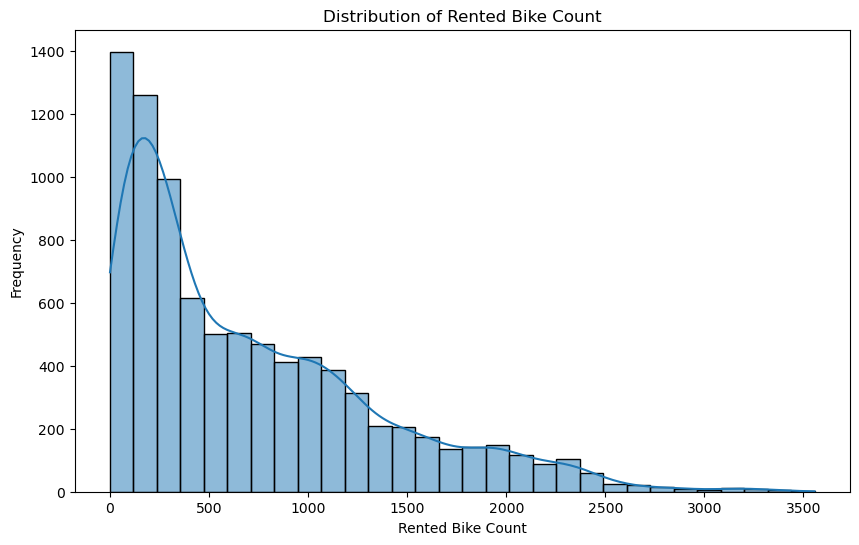

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

In [82]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Time series analysis of Rented Bike Count

The time series analysis of the target variable, Rented Bike Count, will provide insights into the trends, seasonality, and patterns in bike rentals over time. This analysis will help identify the factors that influence bike rental demand, such as weather conditions, day of the week, and time of day. Understanding these patterns will enable the development of a predictive model that can accurately forecast bike rental demand.

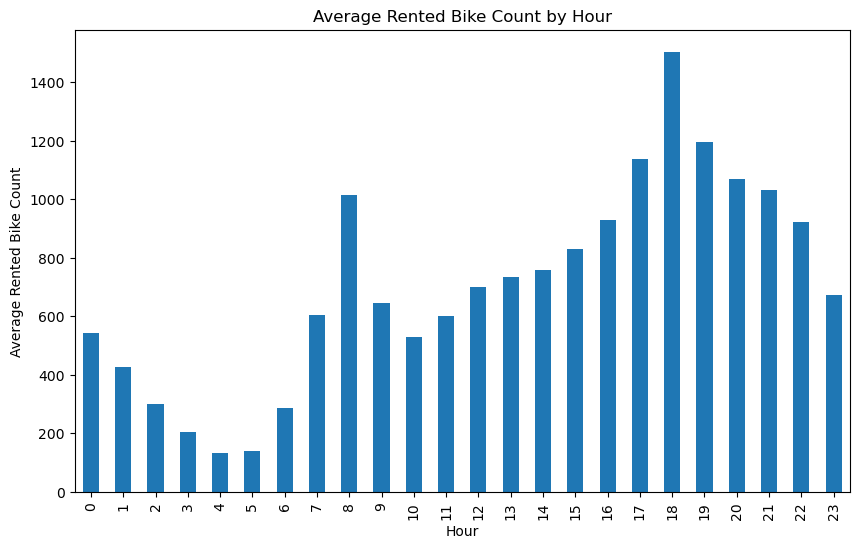

In [83]:
# Hourly trends
hourly_counts = df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.show()

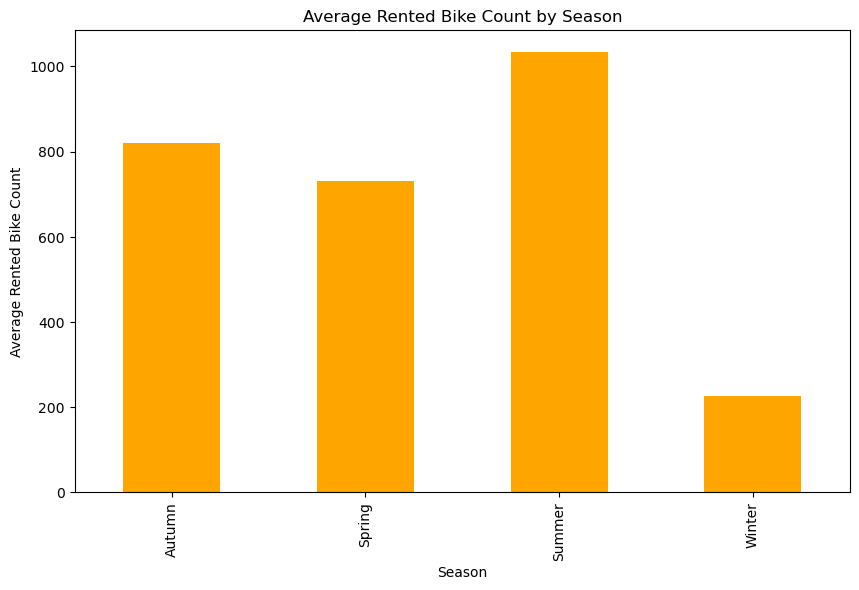

In [84]:
# Seasonal trends
seasonal_counts = df.groupby('Seasons')['Rented Bike Count'].mean()

plt.figure(figsize=(10, 6))
seasonal_counts.plot(kind='bar', color='orange')
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.show()

### 2. Numerical variable exploration

In [85]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Rented Bike Count') 

# Summary statistics of numerical variables
print(df[numerical_cols].describe())

              Hour  Temperature     Humidity   Wind speed   Visibility  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     11.500000    12.882922    58.226256     1.724909  1436.825799   
std       6.922582    11.944825    20.362413     1.036300   608.298712   
min       0.000000   -17.800000     0.000000     0.000000    27.000000   
25%       5.750000     3.500000    42.000000     0.900000   940.000000   
50%      11.500000    13.700000    57.000000     1.500000  1698.000000   
75%      17.250000    22.500000    74.000000     2.300000  2000.000000   
max      23.000000    39.400000    98.000000     7.400000  2000.000000   

       Dew point temperature  Solar Radiation     Rainfall     Snowfall  
count            8760.000000      8760.000000  8760.000000  8760.000000  
mean                4.073813         0.569111     0.148687     0.075068  
std                13.060369         0.868746     1.128193     0.436746  
min               -30.600000         

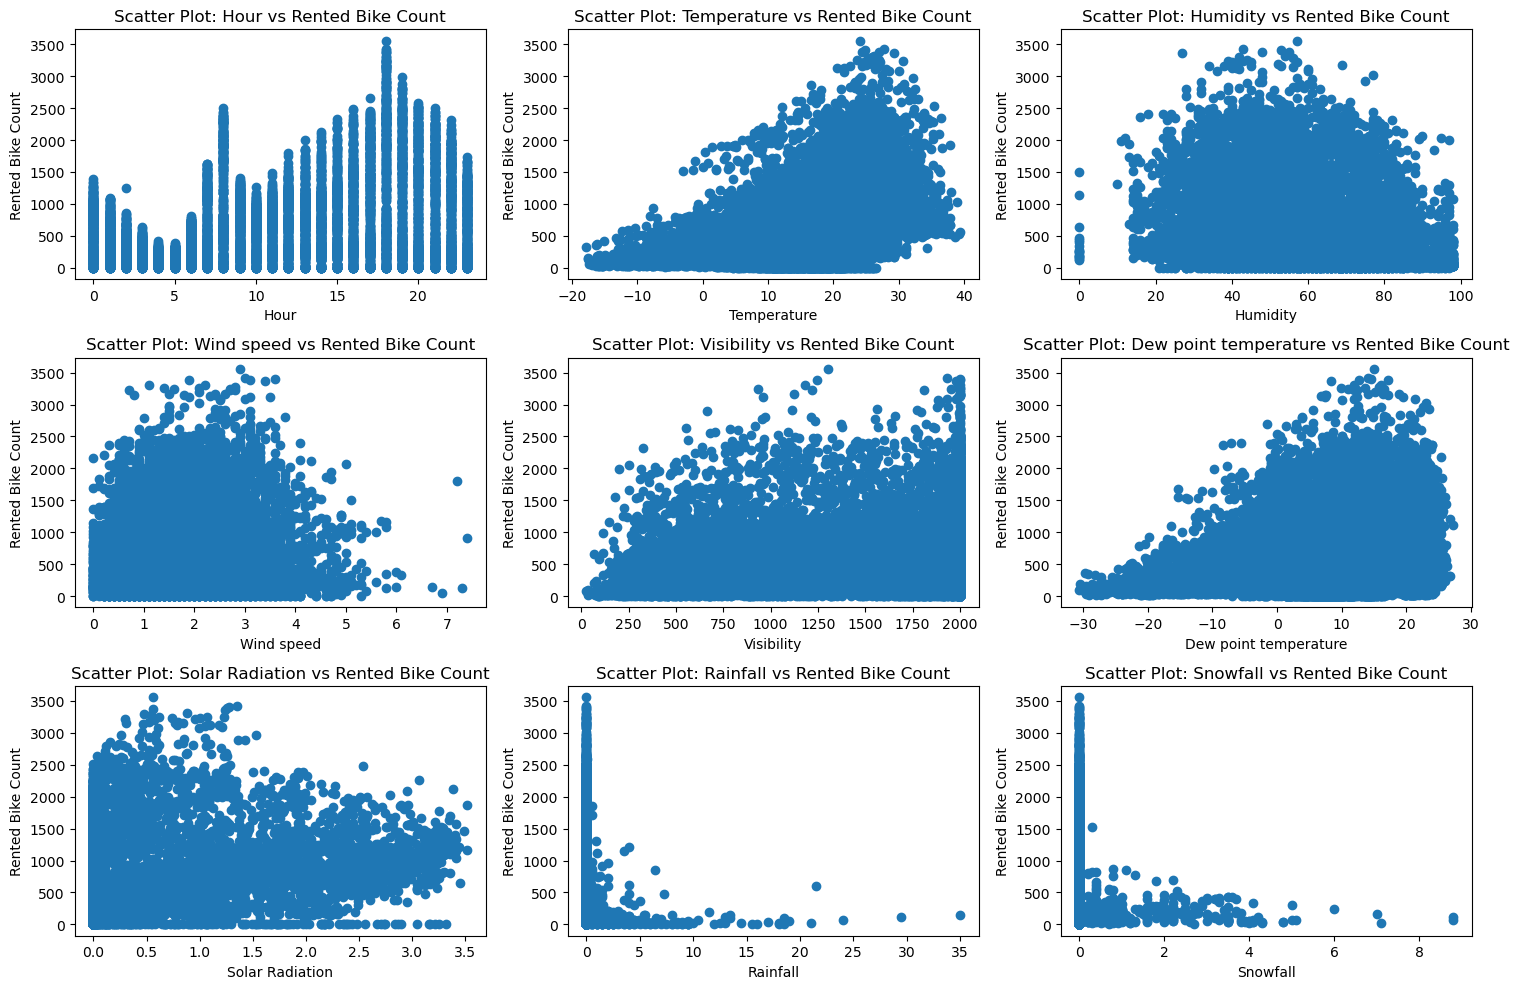

In [86]:
# Scatter plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):  # Excluding 'Rented Bike Count' itself
    plt.subplot(3, 3, i)
    plt.scatter(df[column], df['Rented Bike Count'])
    plt.xlabel(column)
    plt.ylabel('Rented Bike Count')
    plt.title(f'Scatter Plot: {column} vs Rented Bike Count')
plt.tight_layout()
plt.show()

### 3. Finding the correlation between variables

### 4. Normalizing values

### 5. Splitting data intro train and test subsets

### 6. Build a machine learning model

### 7. Perform a cross-validation technique

## VIII) Data Visualization
    presenting number of rented bikes on the basis of hours

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

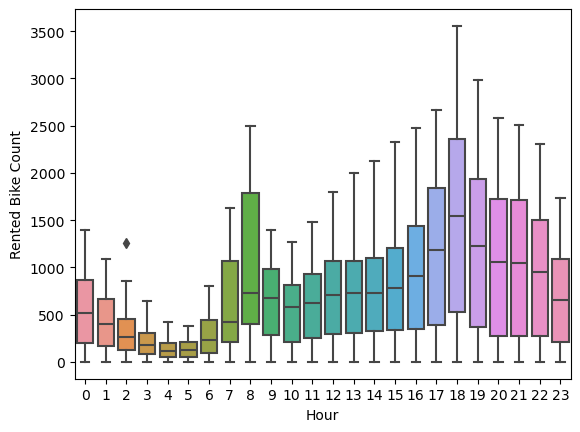

In [87]:
sns.boxplot(x='Hour', y='Rented Bike Count', data = df)

In [88]:
 # Presenting rainfall on the basis of temperature

<Axes: xlabel='Temperature', ylabel='Rainfall'>

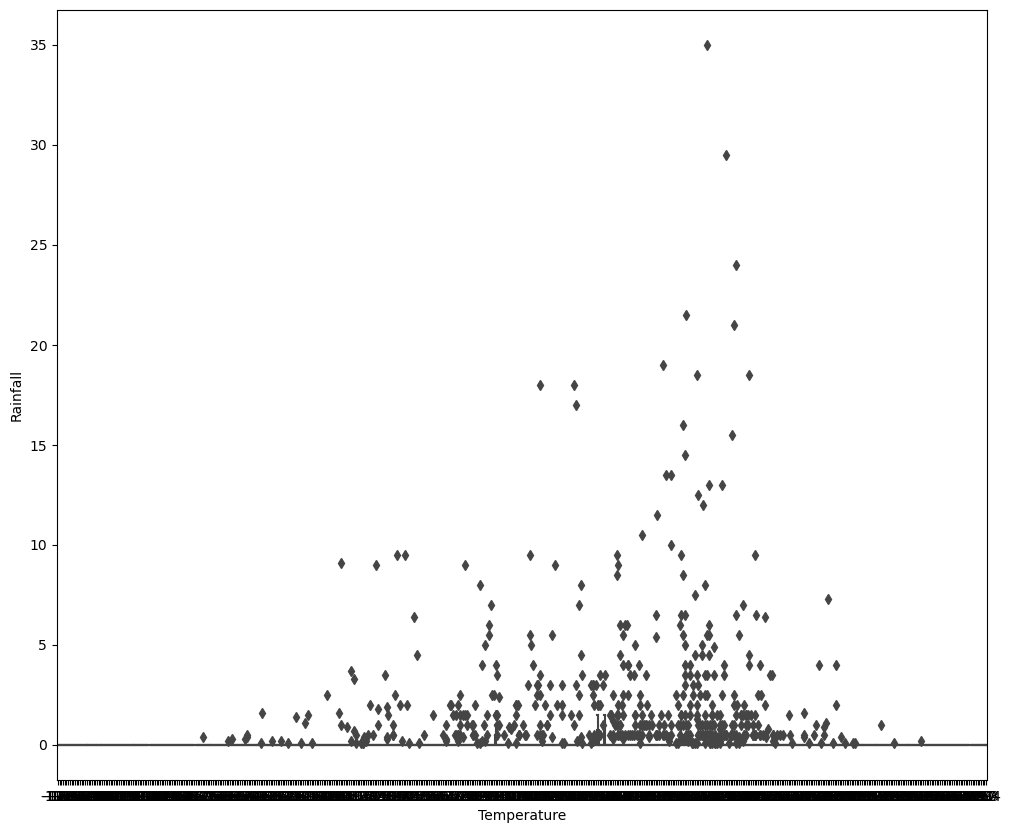

In [89]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Temperature', y='Rainfall', data = df)

<Axes: xlabel='Temperature', ylabel='Snowfall'>

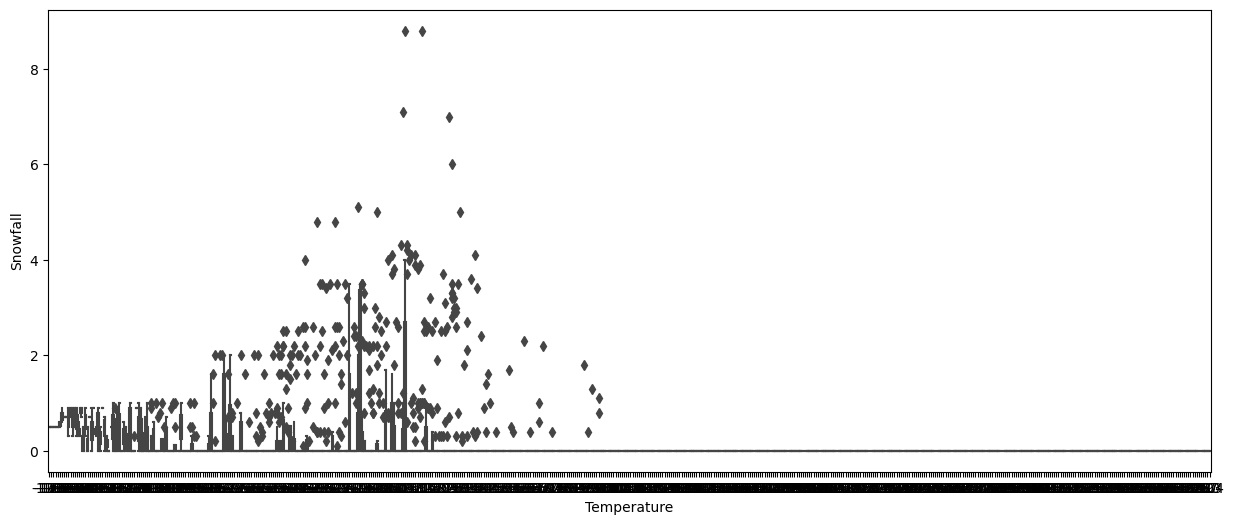

In [90]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Temperature', y='Snowfall', data = df)

<Axes: >

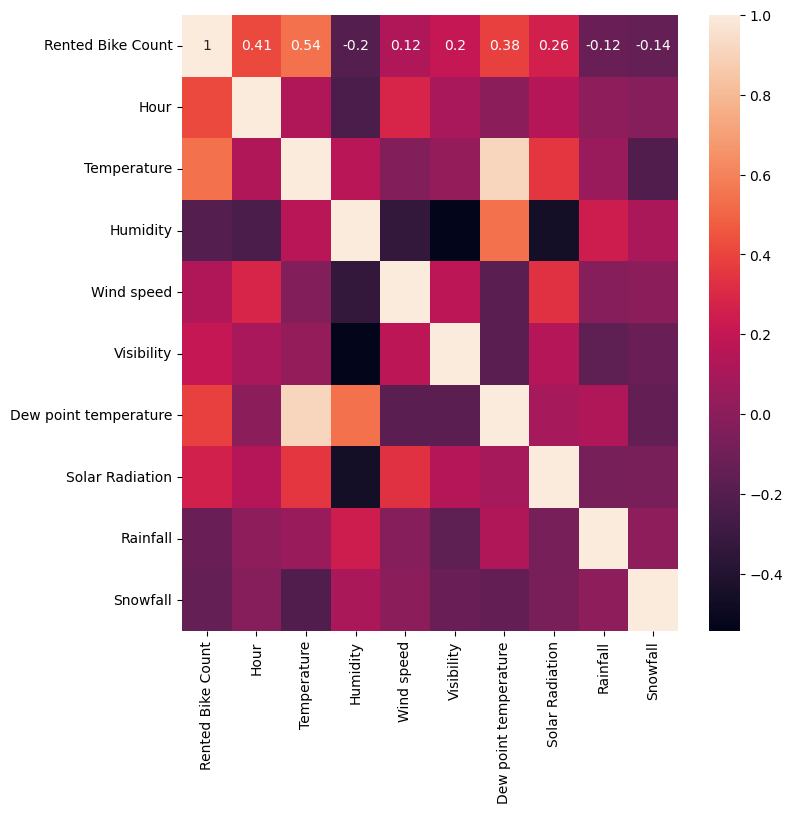

In [91]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

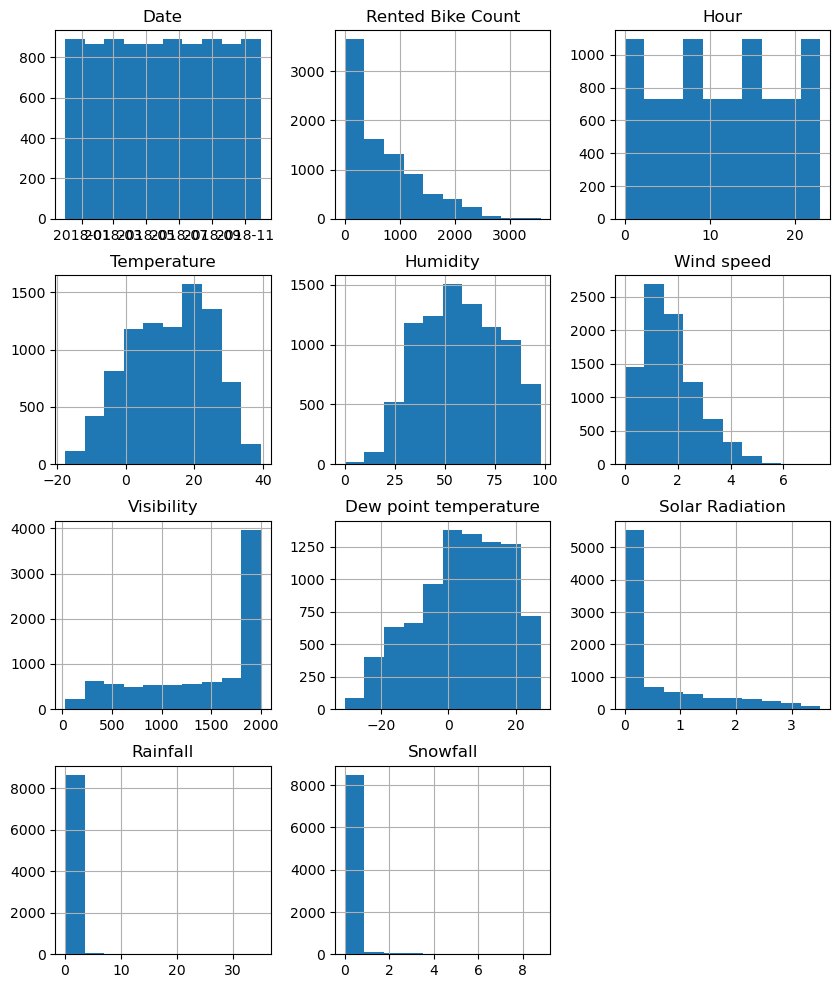

In [92]:
df.hist(figsize=(10,12))
plt.show

Text(0.5, 1.0, 'Functioning Day ')

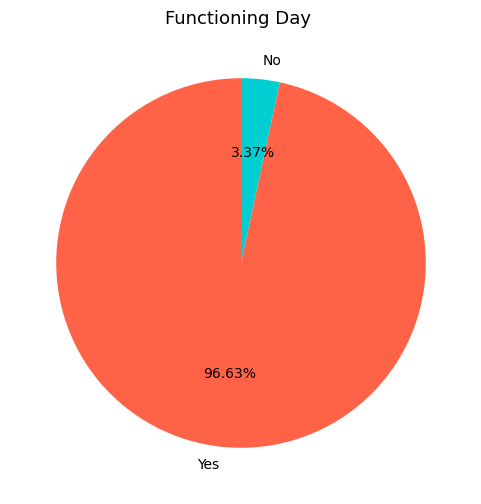

In [93]:
gen_count=df['Functioning Day'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gen_count, labels=gen_count.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1', '#FFD700', '#32CD32'])
plt.title('Functioning Day ', fontsize=13, fontweight='normal')

## References

 E, S. V., Park, J., & Cho, Y. (2020). Using data mining techniques for bike sharing demand prediction in metropolitan city. Computer Communications, 153, 353–366. https://doi.org/10.1016/j.comcom.2020.02.007